# WiDS Datathon 2026 Notebook
This is where your analysis begins. Use this notebook for EDA, modeling, and explanations.

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"marianruxandraelena","key":"d555c8c19d5748d1c2da4888fc6b6613"}'}

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c wids-university-datathon-2025

 93% 375M/403M [00:02<00:00, 135MB/s] 
100% 403M/403M [00:02<00:00, 168MB/s]


In [5]:
!unzip wids-university-datathon-2025.zip -d data/

Archive:  wids-university-datathon-2025.zip
  inflating: data/WiDS _-_ Watch Duty_ Data Dictionary.docx  
  inflating: data/evac_zone_status_geo_event_map.csv  
  inflating: data/evac_zones_gis_evaczone.csv  
  inflating: data/evac_zones_gis_evaczonechangelog.csv  
  inflating: data/fire_perimeters_gis_fireperimeter.csv  
  inflating: data/fire_perimeters_gis_fireperimeterchangelog.csv  
  inflating: data/geo_events_externalgeoevent.csv  
  inflating: data/geo_events_externalgeoeventchangelog.csv  
  inflating: data/geo_events_geoevent.csv  
  inflating: data/geo_events_geoeventchangelog.csv  


In [6]:
!ls data

 evac_zones_gis_evaczonechangelog.csv
 evac_zones_gis_evaczone.csv
 evac_zone_status_geo_event_map.csv
 fire_perimeters_gis_fireperimeterchangelog.csv
 fire_perimeters_gis_fireperimeter.csv
 geo_events_externalgeoeventchangelog.csv
 geo_events_externalgeoevent.csv
 geo_events_geoeventchangelog.csv
 geo_events_geoevent.csv
'WiDS _-_ Watch Duty_ Data Dictionary.docx'


In [8]:
#libraries
import os
import json
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)

DATA_DIR = "data"


In [9]:
files = os.listdir(DATA_DIR)
print("Fișiere disponibile în data/:")
for f in files:
    print(" -", f)


Fișiere disponibile în data/:
 - fire_perimeters_gis_fireperimeterchangelog.csv
 - fire_perimeters_gis_fireperimeter.csv
 - evac_zones_gis_evaczone.csv
 - geo_events_externalgeoeventchangelog.csv
 - geo_events_geoevent.csv
 - evac_zones_gis_evaczonechangelog.csv
 - evac_zone_status_geo_event_map.csv
 - geo_events_geoeventchangelog.csv
 - WiDS _-_ Watch Duty_ Data Dictionary.docx
 - geo_events_externalgeoevent.csv


In [10]:
geo = pd.read_csv("data/geo_events_geoevent.csv")
geo_changelog = pd.read_csv("data/geo_events_geoeventchangelog.csv")
evac_zones = pd.read_csv("data/evac_zones_gis_evaczone.csv")
evac_changelog = pd.read_csv("data/evac_zones_gis_evaczonechangelog.csv")
map_event_zone = pd.read_csv("data/evac_zone_status_geo_event_map.csv")

print("geo:", geo.shape)
print("geo_changelog:", geo_changelog.shape)
print("evac_zones:", evac_zones.shape)
print("evac_changelog:", evac_changelog.shape)
print("map_event_zone:", map_event_zone.shape)


geo: (62696, 17)
geo_changelog: (178697, 5)
evac_zones: (37458, 16)
evac_changelog: (68919, 4)
map_event_zone: (4429, 3)


In [11]:
geo.head()

,id,date_created,date_modified,geo_event_type,name,is_active,description,address,lat,lng,data,notification_type,external_id,external_source,incident_id,reporter_managed,is_visible
0,76,2021-08-11 00:09:56.481066,2023-02-09 20:34:24.180117,wildfire,Todd Fire,0,NaN,"Llano Rd & Todd Rd, Santa Rosa, California 95...",38.386100,-122.769299,"{""is_fps"": false, ""acreage"": 50, ""containment""...",normal,1008375748,pulsepoint,76.0,1,0
1,77,2021-08-11 07:21:46.054995,2023-02-09 20:34:24.225186,wildfire,Vegetation Fire,0,NaN,"Guerneville Rd & W Steele Ln, Santa Rosa, CA 9...",38.459967,-122.728927,"{""is_fps"": false, ""acreage"": 0, ""containment"":...",normal,1008583077,pulsepoint,77.0,1,0
2,78,2021-08-11 21:02:16.301416,2023-02-09 20:34:24.266124,wildfire,Ford Fire,0,NaN,"CA-1 & Valley Ford Estero Rd, Valley Ford, CA ...",38.318328,-122.925698,"{""is_fps"": false, ""acreage"": 0, ""containment"":...",normal,1008957703,pulsepoint,78.0,1,0
3,79,2021-08-12 01:46:31.043052,2023-02-09 20:34:24.308048,wildfire,Vegetation Fire,0,NaN,"19428 Redwood Dr, Monte Rio, CA 95462, USA",38.479988,-122.994156,"{""is_fps"": false, ""acreage"": 0, ""containment"":...",normal,1009152928,pulsepoint,79.0,1,0
4,80,2021-08-12 02:40:30.939331,2023-02-09 20:34:24.358582,wildfire,Shoreline Fire,0,NaN,"Shoreline Dr, Napa, CA 94558, USA",38.315222,-122.276532,"{""is_fps"": false, ""acreage"": 0, ""containment"":...",normal,1009187142,pulsepoint,80.0,1,0


In [12]:
geo_changelog.head()

,id,date_created,changes,geo_event_id,user_created_id
0,1.0,2024-06-19 00:30:52.819841,"{""name"": [""Vegetation Fire"", ""Charlotte Fire""]}",22339.0,16.0
1,2.0,2024-06-19 00:31:10.439467,"{""data.links"": [[], [{""label"": ""Pulsepoint Inc...",22338.0,46044.0
2,3.0,2024-06-19 00:31:25.085624,"{""address"": [""W Ave C & 110th St W, Antelope A...",22339.0,16.0
3,4.0,2024-06-19 00:31:45.603726,{},22339.0,16.0
4,5.0,2024-06-19 00:31:51.368137,"{""data.acreage"": [null, 3]}",22339.0,16.0


In [13]:
evac_zones.head()

,id,date_created,date_modified,uid_v2,is_active,display_name,region_id,source_attribution,dataset_name,source_extra_data,geom,status,geom_label,is_pending_review,pending_updates,external_status
0,1,2025-04-10 13:22:22.896704+00,2025-08-19 01:58:01.009206+00,boulder-CO_US-BO-030-cc87104888faec63,True,BO-030,664,Genasys Protect,boulder-CO_US,{},SRID=4326;POLYGON((-105.281982421875 40.000070...,NaN,SRID=4326;POINT(-105.2735804268792 40.00182377...,False,NaN,Normal
1,2,2025-04-10 13:22:22.896921+00,2025-08-19 01:58:01.00957+00,boulder-CO_US-BO-023-bf0c7318a31e33c2,True,BO-023,664,Genasys Protect,boulder-CO_US,{},SRID=4326;POLYGON((-105.2254199981689 40.01466...,NaN,SRID=4326;POINT(-105.2345969160621 40.02228713...,False,NaN,Normal
2,3,2025-04-10 13:22:22.897002+00,2025-08-19 01:58:01.009741+00,boulder-CO_US-BO-031-d365d7b1d6a30d16,True,BO-031,664,Genasys Protect,boulder-CO_US,{},SRID=4326;POLYGON((-105.2583789825439 40.01459...,NaN,SRID=4326;POINT(-105.2665242186653 40.00886663...,False,NaN,Normal
3,4,2025-04-10 13:22:22.897075+00,2025-08-19 01:58:01.009867+00,boulder-CO_US-BO-005-ccd5de89e7c9e57a,True,BO-005,664,Genasys Protect,boulder-CO_US,{},SRID=4326;POLYGON((-105.260009765625 40.051007...,NaN,SRID=4326;POINT(-105.2727102634684 40.04935539...,False,NaN,Normal
4,5,2025-04-10 13:22:22.897156+00,2025-08-19 01:58:01.010002+00,boulder-CO_US-BO-028-2693ee3d2f362647,True,BO-028,664,Genasys Protect,boulder-CO_US,{},SRID=4326;POLYGON((-105.2680778503418 40.00368...,NaN,SRID=4326;POINT(-105.2773198758852 40.00651191...,False,NaN,Normal


In [14]:
evac_changelog.head()

,id,date_created,changes,evac_zone_id
0,1,2025-04-10 15:29:35.499216+00,"{""geom"": [""POLYGON ((-112.33752250671387 34.67...",26382
1,2,2025-04-10 15:29:35.499255+00,"{""geom"": [""POLYGON ((-112.35966682434082 34.66...",26407
2,3,2025-04-10 17:43:01.429753+00,"{""geom"": [""MULTIPOLYGON (((-121.706523 39.3685...",1656
3,4,2025-04-10 17:43:01.429799+00,"{""geom"": [""POLYGON ((-121.706784 39.364853, -1...",1660
4,5,2025-04-10 17:43:01.42981+00,"{""geom"": [""POLYGON ((-121.703858 39.366719, -1...",1666


In [15]:
map_event_zone.head()

,date_created,uid_v2,geo_event_id
0,2023-10-25 11:28:15.254517,sierra-CA_US-SIE-E062-778dddb3cad71e9f,14107
1,2023-10-25 11:28:15.254550,sierra-CA_US-SIE-E063-f59f54f1edf93b15,14107
2,2023-10-25 11:28:15.254565,sierra-CA_US-SIE-E060-64dbd0e15d47d9bb,14107
3,2023-11-02 21:52:49.867450,butte-CA_US-BUT-CNE-311-474a247dbeb74ebf,14505
4,2024-05-02 20:53:00.964490,kern-CA_US-KRN-289-7cd3f4bbc76a4b2d,18785


In [16]:
def to_datetime_safe(df, cols):
    for c in cols:
        if c in df.columns:
            df[c] = pd.to_datetime(df[c], errors="coerce", utc=True)

to_datetime_safe(geo, ["date_created", "date_modified"])
to_datetime_safe(geo_changelog, ["date_created"])
to_datetime_safe(evac_zones, ["date_created", "date_modified"])
to_datetime_safe(evac_changelog, ["date_created"])


In [17]:
geo[["id", "name", "date_created", "date_modified"]].head(3)

,id,name,date_created,date_modified
0,76,Todd Fire,2021-08-11 00:09:56.481066+00:00,2023-02-09 20:34:24.180117+00:00
1,77,Vegetation Fire,2021-08-11 07:21:46.054995+00:00,2023-02-09 20:34:24.225186+00:00
2,78,Ford Fire,2021-08-11 21:02:16.301416+00:00,2023-02-09 20:34:24.266124+00:00


In [20]:
events = geo[[
    "id",
    "date_created",
    "date_modified",
    "geo_event_type",
    "name",
    "is_active",
    "lat",
    "lng"
] + (["data"] if "data" in geo.columns else [])].copy()

events.rename(columns={"id": "geo_event_id"}, inplace=True)


In [21]:
def extract_json_field(js, key):
    if not isinstance(js, str) or "{" not in js:
        return np.nan
    try:
        js = js.strip().strip('"').strip("'")
        parsed = json.loads(js)
        return parsed.get(key, np.nan)
    except Exception:
        return np.nan


In [22]:
json_fields = [
    "is_prescribed",
    "is_fps",
    "containment",
    "acreage",
    "evacuation_orders",
    "evacuation_warnings",
]

if "data" in events.columns:
    for col in json_fields:
        events[col] = events["data"].apply(lambda x: extract_json_field(x, col))
    events.drop(columns=["data"], inplace=True)
else:
    print("⚠️ Coloana 'data' nu există în geo_events – sărim extracția JSON.")


In [23]:
changes = geo_changelog[[
    c for c in ["geo_event_id", "date_created", "changes"]
    if c in geo_changelog.columns
]].copy()


In [24]:
evac = evac_zones[[
    c for c in [
        "uid_v2",
        "display_name",
        "region_id",
        "is_active",
        "status",
        "geom",
        "geom_label"
    ] if c in evac_zones.columns
]].copy()


In [25]:
evac_changes = evac_changelog[[
    c for c in ["evac_zone_id", "date_created", "changes"]
    if c in evac_changelog.columns
]].copy()


In [27]:
print(map_event_zone.columns.tolist())


['date_created', 'uid_v2', 'geo_event_id']


In [28]:
map_event_zone = map_event_zone.rename(columns={
    "uid_v2": "evac_zone_id"
})

map_event_zone = map_event_zone[["geo_event_id", "evac_zone_id"]].copy()

map_event_zone.head()


,geo_event_id,evac_zone_id
0,14107,sierra-CA_US-SIE-E062-778dddb3cad71e9f
1,14107,sierra-CA_US-SIE-E063-f59f54f1edf93b15
2,14107,sierra-CA_US-SIE-E060-64dbd0e15d47d9bb
3,14505,butte-CA_US-BUT-CNE-311-474a247dbeb74ebf
4,18785,kern-CA_US-KRN-289-7cd3f4bbc76a4b2d


In [29]:
print("Mapping rows:", map_event_zone.shape)
print("Unique geo_event_id:", map_event_zone["geo_event_id"].nunique())
print("Unique evac_zone_id:", map_event_zone["evac_zone_id"].nunique())


Mapping rows: (4429, 2)
Unique geo_event_id: 483
Unique evac_zone_id: 3909


In [30]:
print(evac_changelog.columns.tolist())
evac_changelog.head(3)


['id', 'date_created', 'changes', 'evac_zone_id']


,id,date_created,changes,evac_zone_id
0,1,2025-04-10 15:29:35.499216+00:00,"{""geom"": [""POLYGON ((-112.33752250671387 34.67...",26382
1,2,2025-04-10 15:29:35.499255+00:00,"{""geom"": [""POLYGON ((-112.35966682434082 34.66...",26407
2,3,2025-04-10 17:43:01.429753+00:00,"{""geom"": [""MULTIPOLYGON (((-121.706523 39.3685...",1656


In [33]:
events["has_evac_warning"] = events["evacuation_warnings"].notna()
events["has_evac_order"] = events["evacuation_orders"].notna()

events[["geo_event_id","has_evac_warning","has_evac_order"]].head()


,geo_event_id,has_evac_warning,has_evac_order
0,76,False,False
1,77,False,False
2,78,False,False
3,79,False,False
4,80,False,False


In [34]:
events[["has_evac_warning","has_evac_order"]].mean()


,0
has_evac_warning,0.038073
has_evac_order,0.037546


In [35]:
def has_risk_signal(changes):
    try:
        d = json.loads(changes) if isinstance(changes, str) else changes
        if not isinstance(d, dict):
            return False
        keys = " ".join(d.keys()).lower()
        return any(k in keys for k in [
            "radio_traffic",
            "spotting",
            "structure_threat",
            "rate_of_spread"
        ])
    except:
        return False

changes["risk_signal"] = changes["changes"].apply(has_risk_signal)


In [36]:
first_risk_time = (
    changes[changes["risk_signal"]]
    .groupby("geo_event_id")["date_created"]
    .min()
    .rename("first_risk_time")
    .reset_index()
)

first_risk_time.head()


,geo_event_id,first_risk_time
0,83.0,2021-08-12 08:07:12.323435+00:00
1,88.0,2021-08-13 19:18:23.648715+00:00
2,89.0,2021-08-14 00:25:21.551458+00:00
3,90.0,2021-08-14 08:55:05.936617+00:00
4,95.0,2021-08-16 01:22:35.983958+00:00


In [37]:
analysis_df = (
    events
    .merge(first_risk_time, on="geo_event_id", how="left")
)

analysis_df[[
    "geo_event_id",
    "name",
    "first_risk_time",
    "date_modified",
    "has_evac_warning",
    "has_evac_order"
]].head()


,geo_event_id,name,first_risk_time,date_modified,has_evac_warning,has_evac_order
0,76,Todd Fire,NaT,2023-02-09 20:34:24.180117+00:00,False,False
1,77,Vegetation Fire,NaT,2023-02-09 20:34:24.225186+00:00,False,False
2,78,Ford Fire,NaT,2023-02-09 20:34:24.266124+00:00,False,False
3,79,Vegetation Fire,NaT,2023-02-09 20:34:24.308048+00:00,False,False
4,80,Shoreline Fire,NaT,2023-02-09 20:34:24.358582+00:00,False,False


In [40]:
analysis_df["risk_to_modified_lag_min"] = (
    analysis_df["date_modified"] - analysis_df["first_risk_time"]
).dt.total_seconds() / 60


In [41]:
analysis_df = analysis_df[
    (analysis_df["risk_to_modified_lag_min"].isna()) |
    ((analysis_df["risk_to_modified_lag_min"] >= 0) &
     (analysis_df["risk_to_modified_lag_min"] <= 7*24*60))
]


In [42]:
risk_no_evac = analysis_df[
    (analysis_df["first_risk_time"].notna()) &
    (~analysis_df["has_evac_warning"])
]

len(risk_no_evac)


6181

In [44]:
analysis_df["risk_to_modified_lag_min"].describe(
    percentiles=[0.5, 0.75, 0.9]
)


,risk_to_modified_lag_min
count,6485.000000
mean,831.249462
std,1341.255006
min,0.000262
50%,398.295709
75%,604.649342
90%,1739.097508
max,10072.440552


<Axes: title={'center': 'Lag between first risk signal and public update'}, ylabel='Frequency'>

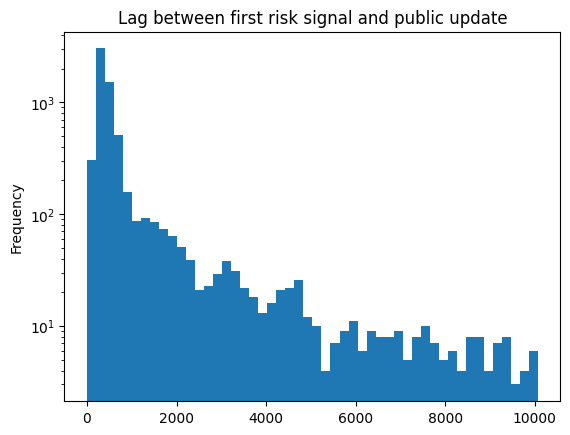

In [45]:
analysis_df["risk_to_modified_lag_min"].dropna().plot(
    kind="hist",
    bins=50,
    logy=True,
    title="Lag between first risk signal and public update"
)


In [46]:
def signal_category(changes):
    try:
        d = json.loads(changes) if isinstance(changes, str) else changes
        keys = " ".join(d.keys()).lower()
        if "spotting" in keys:
            return "spotting"
        if "structure" in keys:
            return "structure_threat"
        if "radio_traffic" in keys:
            return "radio_traffic"
        if "rate_of_spread" in keys:
            return "rate_of_spread"
    except:
        pass
    return None

changes["signal_type"] = changes["changes"].apply(signal_category)

signal_lag = (
    changes.merge(
        analysis_df[["geo_event_id","risk_to_modified_lag_min"]],
        on="geo_event_id",
        how="left"
    )
)

signal_lag.groupby("signal_type")["risk_to_modified_lag_min"].median()


,risk_to_modified_lag_min
signal_type,
radio_traffic,413.132371
spotting,2115.190701
structure_threat,645.932850


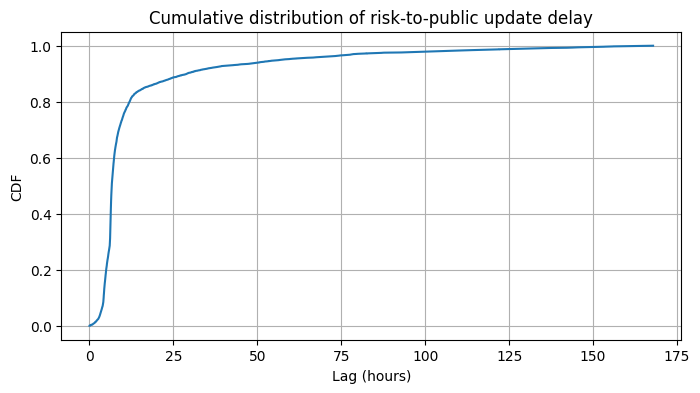

In [47]:
import numpy as np

lags = analysis_df["risk_to_modified_lag_min"].dropna().values
sorted_lags = np.sort(lags)
cdf = np.arange(1, len(sorted_lags)+1) / len(sorted_lags)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.plot(sorted_lags/60, cdf)
plt.xlabel("Lag (hours)")
plt.ylabel("CDF")
plt.title("Cumulative distribution of risk-to-public update delay")
plt.grid(True)


In [51]:
def signal_category(changes):
    if pd.isna(changes):
        return None

    try:
        if isinstance(changes, dict):
            text = json.dumps(changes).lower()
        else:
            text = str(changes).lower()
    except:
        return None

    if "spotting" in text:
        return "spotting"
    if "structure" in text:
        return "structure_threat"
    if "radio" in text:
        return "radio_traffic"
    if "rate_of_spread" in text or "spread" in text:
        return "rate_of_spread"

    return None


In [52]:
changes["signal_type"] = changes["changes"].apply(signal_category)

changes["signal_type"].value_counts(dropna=False)


,count
signal_type,
None,168742
radio_traffic,9165
structure_threat,686
spotting,95
rate_of_spread,9


In [53]:
SIGNAL_WEIGHTS = {
    "spotting": 3,
    "structure_threat": 2,
    "radio_traffic": 1
}

changes["signal_weight"] = changes["signal_type"].map(SIGNAL_WEIGHTS).fillna(0)

changes[["geo_event_id","signal_type","signal_weight"]].head(10)


,geo_event_id,signal_type,signal_weight
0,22339.0,None,0.0
1,22338.0,None,0.0
2,22339.0,None,0.0
3,22339.0,None,0.0
4,22339.0,None,0.0
5,22339.0,None,0.0
6,22339.0,None,0.0
7,21508.0,None,0.0
8,21947.0,None,0.0
9,22329.0,None,0.0


In [54]:
changes["signal_weight"].value_counts()


,count
signal_weight,
0.0,168751
1.0,9165
2.0,686
3.0,95


In [55]:
risk_score_df = (
    changes
    .groupby("geo_event_id")["signal_weight"]
    .sum()
    .reset_index()
    .rename(columns={"signal_weight": "risk_trigger_score"})
)

risk_score_df.describe()


,geo_event_id,risk_trigger_score
count,42231.000000,42231.000000
mean,40528.296678,0.255878
std,14026.440545,0.726531
min,83.000000,0.000000
25%,30522.500000,0.000000
50%,41346.000000,0.000000
75%,52045.500000,0.000000
max,62821.000000,22.000000


In [56]:
ALERT_THRESHOLD = 3


In [57]:
risk_score_df["proactive_alert"] = (
    risk_score_df["risk_trigger_score"] >= ALERT_THRESHOLD
)

risk_score_df["proactive_alert"].value_counts()


,count
proactive_alert,
False,41593
True,638
